In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [2]:
ic=pd.read_csv("C:/Users/pal/Desktop/projects/project_11/insurance_claim.csv")

One has to predict the claim amount in the Automobile insurance dataset(regression problem; y=Total Claim Amount).

In [3]:
def show_all(df, nrow=None, ncol=None):
    with pd.option_context('display.max_columns', ncol):
        display(df)
show_all(ic.head())

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
ic= ic.drop(['Customer'], axis=1)

cat_features = list(ic.select_dtypes(include=['object']).columns)
print (len(cat_features))

cat_uniques = []
for cat in cat_features:
    cat_uniques.append(len(ic[cat].unique()))

cat_ic = pd.DataFrame.from_items([('cat_names', cat_features), ('unique_values', cat_uniques)])
cat_ic.head().T

17


C:\Users\pal\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  # Remove the CWD from sys.path while we load stuff.


,0,1,2,3,4
cat_names,Country,State Code,State,Response,Coverage
unique_values,1,5,5,2,3


In [5]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints       

In [6]:
cat_ic.head(17).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
cat_names,Country,State Code,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
unique_values,1,5,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3


In [7]:
ic= ic.drop(['Country', 'State Code'], axis=1)

In [9]:
ic["Effective_Date"] = ic['Effective To Date'].str.split('/').str[1].astype(int)
ic["Effective_month"] = ic['Effective To Date'].str.split('/').str[0].astype(int)
ic["Effective_year"] = ic['Effective To Date'].str.split('/').str[2].astype(int)

In [15]:
show_all(ic.head())

,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective_Date,Effective_month,Effective_year
0,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,24,2,11
1,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,31,1,11
2,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize,19,2,11
3,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize,20,1,11
4,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize,3,2,11


In [21]:
ic['Effective_year'].value_counts()

11    9134
Name: Effective_year, dtype: int64

In [22]:
ic= ic.drop(['Effective_year', 'Effective To Date'], axis=1)

In [10]:
ic.isnull().sum()

State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Effective_Date                   0
Effective_month                  0
Effective_year                   0
dtype: int64

In [11]:
ic.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Effective_Date,Effective_month,Effective_year
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.0
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,15.461134,1.463762,11.0
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,8.653770,0.498712,0.0
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000,1.000000,11.0
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,8.000000,1.000000,11.0
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,15.000000,1.000000,11.0
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,23.000000,2.000000,11.0
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,31.000000,2.000000,11.0


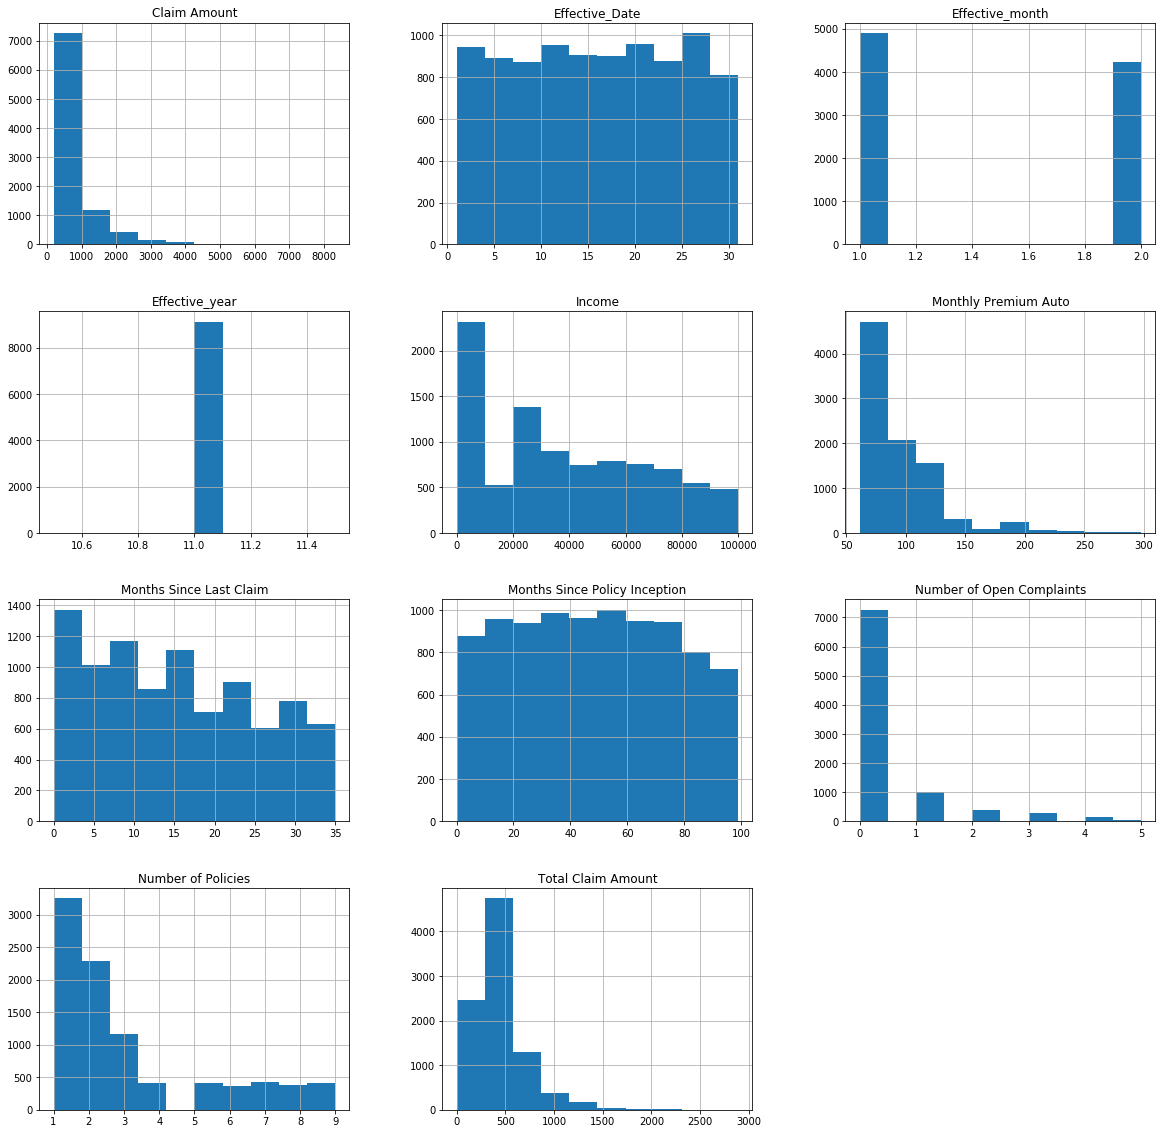

In [12]:
ic.hist(figsize=(20,20))
plt.show()


In [13]:
ic.groupby('State').size(),ic.groupby('Response').size(), ic.groupby('Coverage').size(),

(State
 Iowa        2601
 Kansas       798
 Missouri    3150
 Nebraska    1703
 Oklahoma     882
 dtype: int64, Response
 No     7826
 Yes    1308
 dtype: int64, Coverage
 Basic       5568
 Extended    2742
 Premium      824
 dtype: int64)

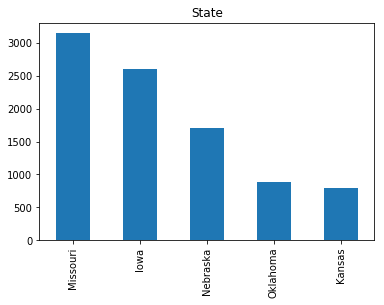

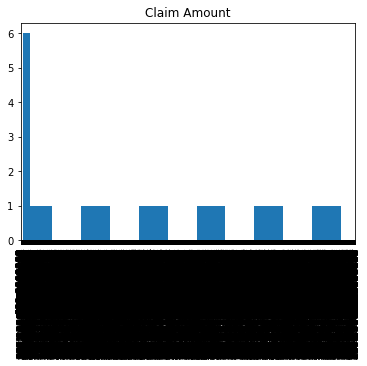

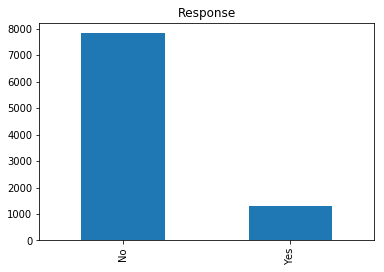

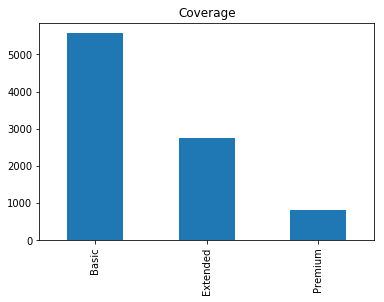

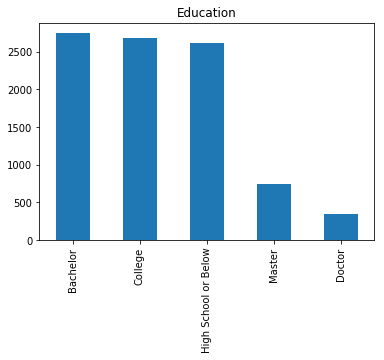

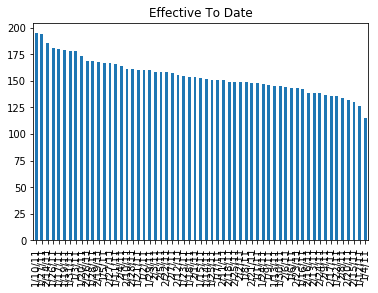

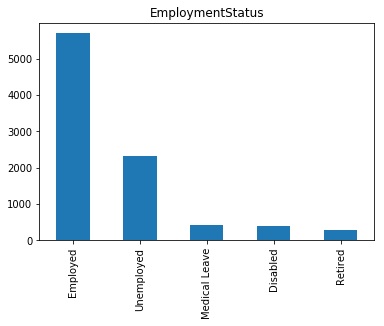

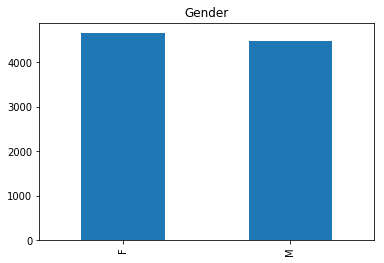

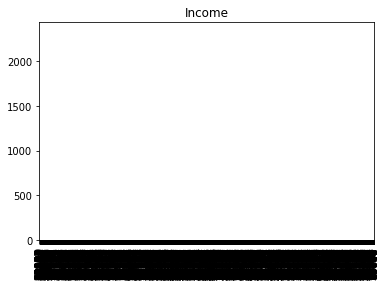

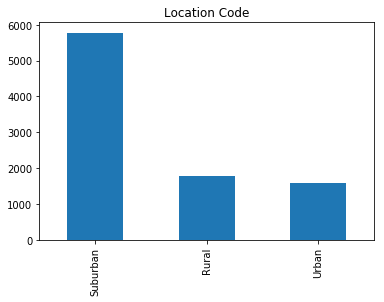

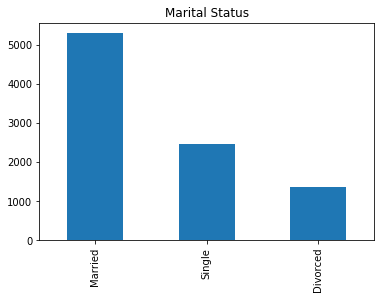

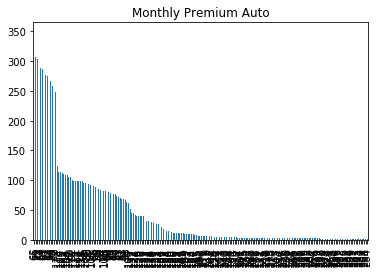

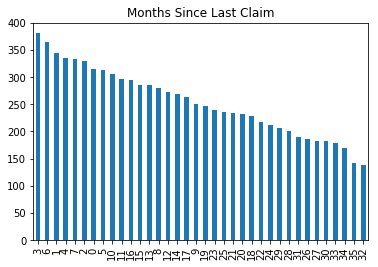

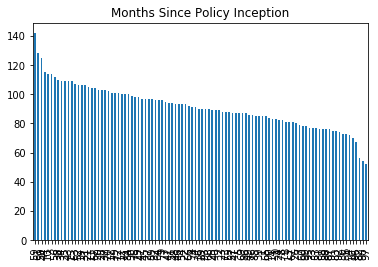

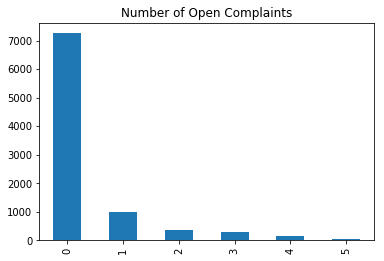

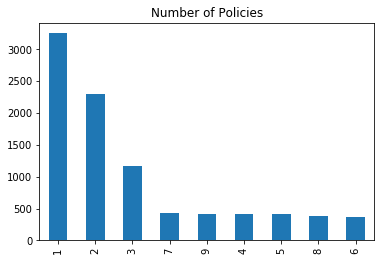

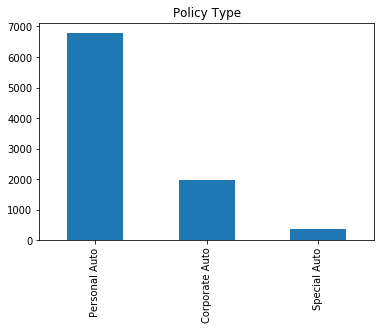

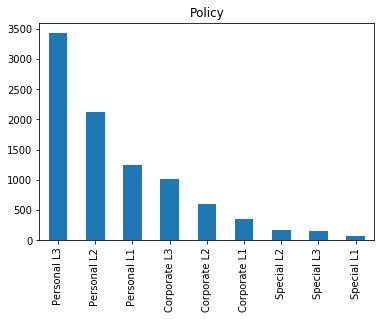

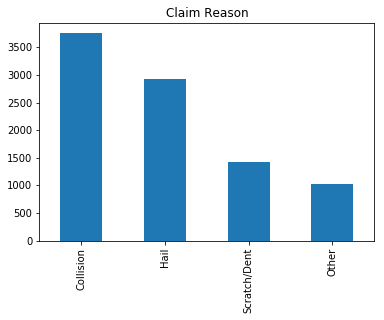

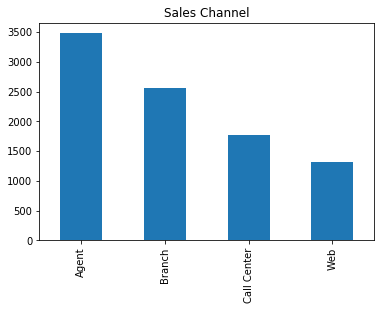

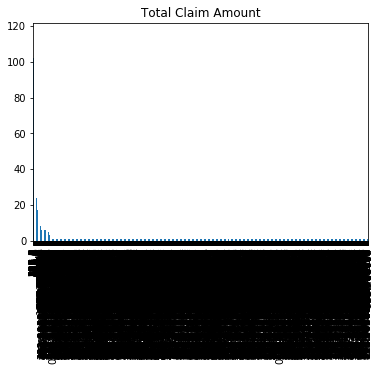

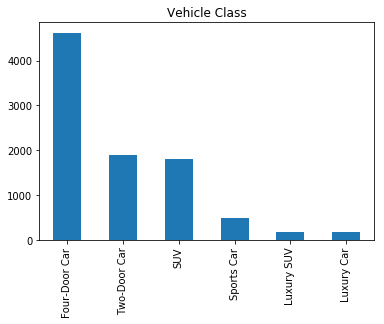

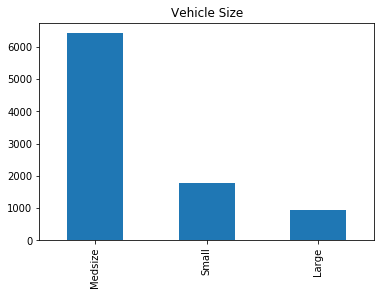

In [14]:
variables = ['State','Claim Amount','Response','Coverage','Education',
       'Effective To Date','EmploymentStatus','Gender', 'Income',
       'Location Code','Marital Status','Monthly Premium Auto',
       'Months Since Last Claim','Months Since Policy Inception',
       'Number of Open Complaints','Number of Policies', 'Policy Type',
       'Policy','Claim Reason','Sales Channel', 'Total Claim Amount',
       'Vehicle Class','Vehicle Size']
for v in variables:
    d = ic.sort_values(by=[v])
    d[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()


In [24]:
from sklearn.preprocessing import StandardScaler
c = ['Total Claim Amount','Number of Policies', 'Number of Open Complaints','Months Since Policy Inception', 'Months Since Last Claim','Monthly Premium Auto','Income','Claim Amount','Effective_month', 'Effective_Date']
sc=StandardScaler()
ic[c]=sc.fit_transform(ic[c])

C:\Users\pal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
X=ic.drop('Claim Amount',axis=1)
y=ic['Claim Amount']

In [26]:
X=pd.get_dummies(X)

In [27]:
X.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Effective_Date,Effective_month,State_Iowa,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640,0.986776,1.075304,0,...,0,0,0,0,0,0,1,0,1,0
1,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737,1.795716,-0.929969,0,...,0,1,0,0,0,0,0,0,1,0
2,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734,0.408962,1.075304,0,...,0,0,0,0,0,0,1,0,1,0
3,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769,0.524524,-0.929969,0,...,0,0,0,0,1,0,0,0,1,0
4,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843,-1.440045,1.075304,0,...,0,1,0,0,0,0,0,0,1,0


In [28]:
X.shape

(9134, 66)

In [39]:
from sklearn.model_selection import train_test_split
seed=0
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=47)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR()))
models.append(('XGBR', xgb.XGBRegressor()))
models.append(('DTR', DecisionTreeRegressor(random_state=seed)))
models.append(('RFR (100 Trees)', RandomForestRegressor(n_estimators=100, random_state=seed)))

In [44]:
def myplot(XX, yy):
    from sklearn.model_selection import ShuffleSplit
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)

    results = []
    names = []

    for name, model in models:
        cv_results = cross_val_score(model, XX, yy, cv = cv, scoring = make_scorer(r2_score))
        results.append(cv_results)
        names.append(name)
        msg = "%s: %.3f (+/- %.3f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    fig = plt.figure()
    fig.suptitle('R2')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

LR: 0.164 (+/- 0.015)


C:\Users\pal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The 

SVR: 0.110 (+/- 0.012)
[12:48:42] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\pal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\pal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:45] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\pal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:48] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\pal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:50] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\pal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:53] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\pal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:55] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\pal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:58] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\pal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:49:00] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\pal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:49:03] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:05] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\pal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBR: 0.681 (+/- 0.008)
DTR: 0.439 (+/- 0.042)
RFR (100 Trees): 0.701 (+/- 0.012)


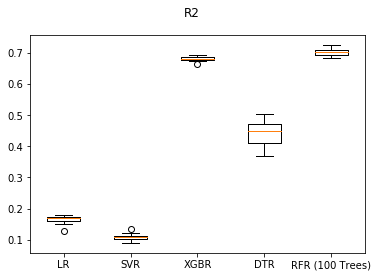

In [45]:
myplot(X_train, y_train)

LR: 0.164 (+/- 0.015)
XGBR: 0.681 (+/- 0.008)
DTR: 0.439 (+/- 0.042)
RFR (100 Trees): 0.701 (+/- 0.012)
therefore RandomForestRegressor and XGBRegressor is best for claim amount prediction

In [48]:
model1=xgb.XGBRegressor(colsample_bylevel=0.95, 
                       colsample_bytree=0.95,
                       gamma=1, #1
                       learning_rate=0.1, #0.1
                       max_depth=12,#10
                       min_child_weight=1, 
                       n_estimators=600, #500
                       objective='reg:linear', 
                       reg_alpha=1, 
                       reg_lambda=1,
                       scale_pos_weight=1, 
                       seed=99, 
                       subsample=0.95,
                       silent=True)
model1.fit(X_train,y_train)
y_pred= model1.predict(X_test)
model1.score(X_test,y_test)

C:\Users\pal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.6881711451292167

In [50]:
model2= RandomForestRegressor(n_estimators=100, random_state=seed)
model2.fit(X_train,y_train)
y_pred= model2.predict(X_test)
model2.score(X_test,y_test)

0.6952807330500098